### Import thư viện

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Đọc dữ liệu từ file csv

In [183]:
df = pd.read_csv("./Sample - Superstore.csv",encoding = "ISO-8859-1")

## Tiền xử lý

**In 5 dòng đầu tiên của dữ liệu**

In [184]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Thông tin số dòng và số cột**

In [185]:
df.shape

(9994, 21)

**Mô tả dữ liệu**

In [186]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Thông tin cột**

In [187]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Kiểu dữ liệu của từng cột**

In [188]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

**Số giá trị null của từng cột**

In [189]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Ta thấy không có giá trị null trong dataframe

**Loại bỏ cột không cần thiết**

Các cột bị loại bỏ:
- Cột `Country` vì chỉ có một giá trị duy nhất là "United States"
- Cột `Order ID` không mang giá trị hữu ích trong trực quan hóa và mô hình hóa dữ liệu
- Cột `Postal Code` chỉ là id của `City` đã được thể hiện ở cột trước

In [190]:
df["Country"].unique()

array(['United States'], dtype=object)

In [191]:
unused_columns = [
    'Country', 
    'Order ID',
    'Postal Code']

df.drop(columns=unused_columns, inplace=True)
df.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

**Chuyển về kiểu dữ liệu datetime**

Áp dụng cho 2 cột `Order Date` và `Ship Date`

In [192]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

Kiểu tra kiểu dữ liệu

In [193]:
df.dtypes

Row ID                    int64
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Cách trích xuất thông tin từ dữ liệu datetime

In [194]:
df['Order Date'].dt.day

0        8
1        8
2       12
3       11
4       11
        ..
9989    21
9990    26
9991    26
9992    26
9993     4
Name: Order Date, Length: 9994, dtype: int64

## Hàm tiện ích ##

In [195]:
# Helper Function For Visualization
def Viz_Bar(df1 , cx , cy ,t='',rot="horizontal" , x=True ):
    if(x is False):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        ax.barh(df1.head(10)[cx], df1.head(10)[cy], align='center', color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        ax.set_yticks(df1.head(10)[cx], labels=df1.head(10)[cx])
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel(cy)
        ax.set_title(t)
        plt.xticks(rotation = rot)
        plt.show()
    else :
        plt.bar(df1.head(10)[cx] ,df1.head(10)[cy] ,  color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        plt.xlabel(cx)
        plt.ylabel(cy)
        plt.title(t)
        plt.xticks(rotation = rot)
        plt.show()
        

## Đưa ra câu hỏi và câu trả lời

**Câu 1:** Sự khác nhau về doanh số của các hạng mục giữa các vùng miền của nước Mỹ?

**Câu 2:** Số lượng lượt mua sắm ở mỗi bang khác nhau như thế nào?

**Câu 3:** Số lượng các sản phẩm bán ra của mỗi danh mục qua từng năm tăng giảm như thế nào?

**Câu 4:** Hãy phân tích về các loại sản phẩm được bán ở siêu thị này dựa trên các yếu tố: sales, profit, quantity,...

**Câu 5:** Hãy phân tích về các sự kiện discount của cửa hàng và mối liên hệ giữa Discount và các yếu tố khác.

**Câu 6:** Quan sát và đánh giá về khách hàng.

**Câu 7:** Phân tích mối quan hệ giữa khách hàng và khu vực sinh sống.

**Câu 8:** Phân tích mối quan hệ giữa lợi nhuận và doanh thu.


## Câu hỏi 1:

**Nội dung câu hỏi:** Sự khác nhau về doanh số của các hạng mục giữa các vùng miền của nước Mỹ?


**Loại biểu đồ sử dụng:** Tree Map

**Tính phù hợp của biểu đồ với dữ liệu:** TreeMap là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các hình chữ nhật có diện tích khác nhau, trong đó độ lớn của hình chữ nhật sẽ đại diện cho giá trị lượng của một biến. Ta sẽ biểu tổng doanh số ở mỗi hạng mục sản phẩm bằng diện tích các hình chữ nhật theo từng vùng miền (vùng trung tâm, miền đông, miền tây, miền nam). Bằng cách này ta có thể dễ dàng so sánh tỉ lệ doanh thu giữa các hạng mục sản phẩm và giữa các vùng miền với nhau.

**Trực quan hóa:**

In [196]:
plot_df=df.groupby(["Region","Category"])["Sales"].sum().reset_index()

In [197]:
fig = px.treemap(plot_df,
                 path = ['Region','Category','Sales'],
                 values = 'Sales')

fig.update_layout(title={'text': "Sales by categories in the US regions",'y':0.85,'x':0.5},
                  titlefont = dict(size = 25, family="Franklin Gothic"),
                  template='simple_white',
                  paper_bgcolor='#DDF7E6',
                  plot_bgcolor='#FFF1D7',
                  treemapcolorway = ["#C44B6E",'#5F8D37', "#F7AD45","#97D0D7"],
                  height = 600,
                  width = 1000,
                  margin=dict(t=130 ,))
fig.show()

Nhận xét:

Xếp hạng tổng doanh số các vùng miền như sau: West > East > Central > South.

Sản phẩm về công nghệ (Technology) có doanh số cao hơn các doanh mục sản phẩm khác tại miền Tây, miền Nam và vùng trung tâm.

## Câu hỏi 2:

**Nội dung câu hỏi:** Số lượng lượt mua sắm ở mỗi bang khác nhau như thế nào?

**Loại biểu đồ sử dụng:** Chorolepth map

**Tính phù hợp của biểu đồ với dữ liệu:** Dữ liệu để trả lời cho câu hỏi này gồm có 2 loại đó là: dạng số (tổng số lượng lượt mua sắm) và vị trí (các bang của nước Mỹ). Dùng biểu đồ Chorolepth giúp dễ dàng so sánh tổng số lượng lượt mua sắm giữa các khu vực. Biểu đồ choropleth thể hiện giá trị dữ liệu theo mức độ màu sắc. Điều này cho phép người sử dụng dễ dàng so sánh giá trị dữ liệu giữa các khu vực.

**Trực quan hóa:**

In [198]:
#Xử lý dữ liệu
State_code = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

plot_df=df.copy()
plot_df['State_code'] = plot_df['State'].replace(State_code)

In [199]:
# Plot
fig = go.Figure(data=go.Choropleth(
    locations= plot_df['State_code'].value_counts().index,
    z = plot_df['State_code'].value_counts(),
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 2100
))

fig.update_layout(
    font = dict(size = 14, family="Franklin Gothic"),
    title={'text': "Number of purchases in each State",'y':0.95,'x':0.5},
    geo_scope='usa',
    height = 500,
    width = 900
)

fig.show()

**Nhận xét:** 

Dựa vào các thông tin hiển thị trên bảng đồ Hoa Kỳ, ta có thể thấy:
- Bang California có tổng số lượt tham gia mua sắm đông nhất với 2001 lượt, nhu cầu mua sắm ở California là cao nhất bởi lẽ đây là tiểu bang có dân số đông nhất Hoa Kỳ và lớn thứ ba về diện tích. Xếp sau nó là New York với 1128 lượt và Taxes với 985 lượt, đây đều là những tiểu bang đông dân và phát triển bậc nhất của Hoa Kỳ.

- Ngược lại với Wyoming - tiểu bang có dân số ít nhất hoa Kỳ, chỉ ghi nhận được 1 lượt mua sắm.

=> Khu vực có dân số càng đông và nền kinh tế càng phát triển thì nhu cầu mua sắm trang thiết bị càng lớn.

## Câu hỏi 3:

**Nội dung câu hỏi:** Số lượng các sản phẩm bán ra của mỗi danh mục qua từng năm tăng giảm như thế nào?

**Loại biểu đồ sử dụng:** Scatter plot

**Tính phù hợp của biểu đồ với dữ liệu:** biểu đồ Scatter plot phù hợp để thể hiện tình hình số lượng các sản phẩm bán ra (Quantity) theo từng danh mục sản phẩm có trong thuộc tính 'Category'. Kết hợp với hiệu ứng animation cho từng năm sẽ làm cho biểu đồ có tính tương tác cao và sinh động hơn.

**Trực quan hóa:**

In [200]:
#Xử lý dữ liệu
temp=df.copy()
temp['Order Date']=pd.to_datetime(temp['Order Date'], format='%m/%d/%Y')
temp['Order Year']=temp['Order Date'].dt.year
plot_df= temp.groupby(['Order Year','Category'])["Quantity"].sum().reset_index()

In [201]:
#Plot
fig=px.scatter(plot_df, y = 'Quantity', x = 'Category', size = 'Quantity', hover_name = 'Category', color = 'Category', 
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'Order Year',size_max=50,
           range_y=[1000,8600]).update_yaxes(categoryarray = ['Furniture', 'Office Supplies', 'Technology'])

fig.update_layout(title={'text': "Total number of products sold by each category by year",'y':0.85,'x':0.5},
                  titlefont = dict(size = 25, family="Franklin Gothic"),
                  height = 600,
                  width = 1000,
                  margin=dict(t=130 ,))

fig.show()

Nhận xét:

Sử dụng tính năng animation trên biểu đồ để quan sát số lượng các sản phẩm bán ra của từng danh mục qua từng năm ta có nhận xét:

Số lượng sản phẩm bán ra ở mọi danh mục (Funiture, Office Supplies, Technology) đều tăng qua từng năm. Đặc biệt, các sản phẩm trong Office Supplies có số lượng bán ra nhiều nhất (trong năm 2017 gấp 4 lần các danh mục khác) và tốc độ tăng mạnh nhất qua từng năm.

### Câu 4: Hãy phân tích về các loại sản phẩm được bán ở siêu thị này dựa trên các yếu tố: sales, profit, quantity,...

Để trả lời câu hỏi này, ta sẽ chia ra trả lời 3 câu hỏi nhỏ, dựa trên 3 yếu tố là: Sales, Profit, Quantity.

#### 1. Sales

Tính tổng số lượng các sản phẩm đã bán dựa theo Category và Sub-category.

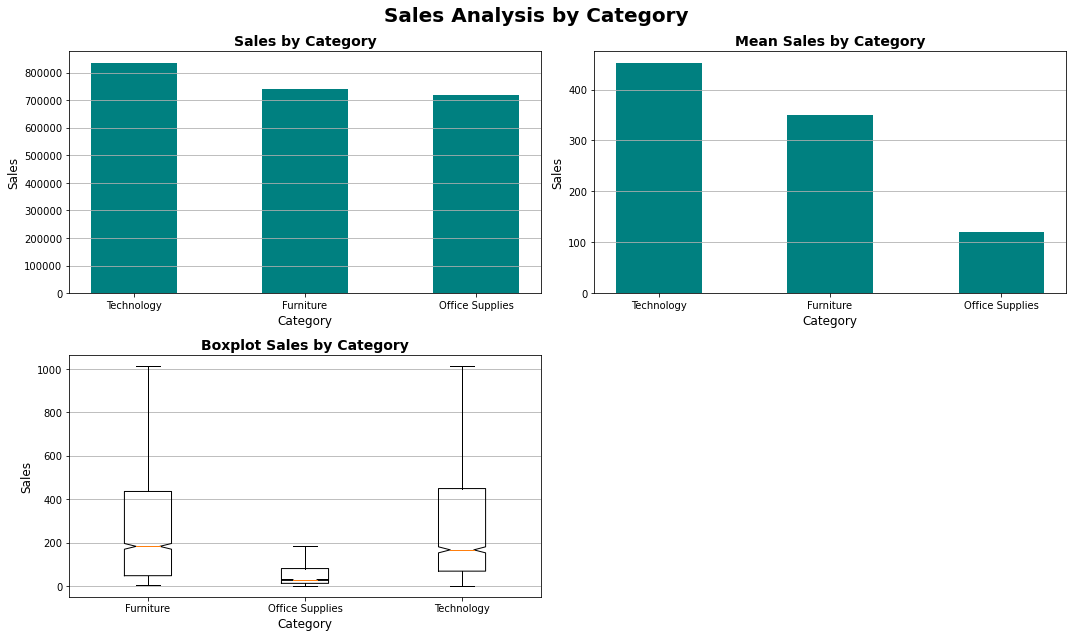

In [202]:
# Tính tổng giá trị sales theo Category
# Gộp nhóm theo Category để tạo bảng tính tổng và lưu vào dataframe
sales_per_category = df[['Category', 'Sales']].groupby('Category').sum().reset_index()
sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Category và lưu vào dataframe
mean_sales_per_category = df[['Category', 'Sales']].groupby('Category').mean().reset_index()
mean_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Sales Analysis by Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(sales_per_category['Category'], sales_per_category['Sales'], width=0.5, color='teal')
axs[0, 0].set_title('Sales by Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Category', fontsize=12)
axs[0, 0].set_ylabel('Sales', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_sales_per_category['Category'], mean_sales_per_category['Sales'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Sales by Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Category', fontsize=12)
axs[0, 1].set_ylabel('Sales', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Category'] == category]['Sales'] for category in df['Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Sales by Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Category', fontsize=12)
axs[1, 0].set_ylabel('Sales', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Category'].unique())
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

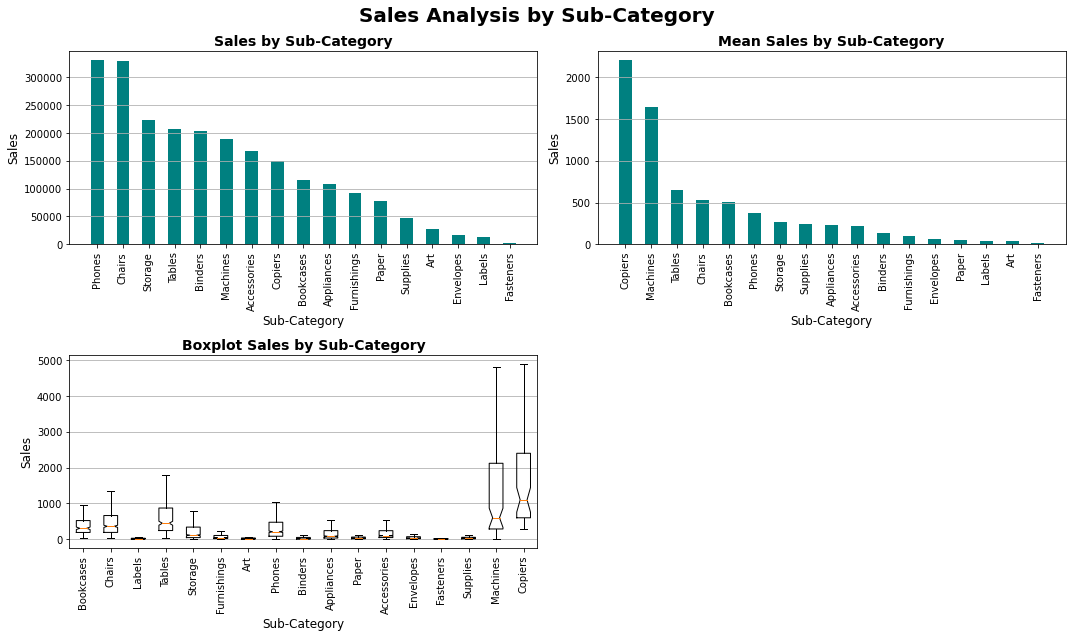

In [203]:
# Tính tổng giá trị sales theo Category
# Gộp nhóm theo Sub-Category để tạo bảng tính tổng và lưu vào dataframe
sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').sum().reset_index()
sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Sub-Category và lưu vào dataframe
mean_sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').mean().reset_index()
mean_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Sales Analysis by Sub-Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(sales_per_sub_category['Sub-Category'], sales_per_sub_category['Sales'], width=0.5, color='teal')
axs[0, 0].set_title('Sales by Sub-Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Sub-Category', fontsize=12)
axs[0, 0].set_ylabel('Sales', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10, rotation=90)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_sales_per_sub_category['Sub-Category'], mean_sales_per_sub_category['Sales'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Sales by Sub-Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Sub-Category', fontsize=12)
axs[0, 1].set_ylabel('Sales', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10, rotation=90)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Sub-Category'] == sub_category]['Sales'] for sub_category in df['Sub-Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Sales by Sub-Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Sub-Category', fontsize=12)
axs[1, 0].set_ylabel('Sales', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Sub-Category'].unique(), rotation=90)
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

#### 2. Profit

Tính lợi nhuận (Profit) các sản phẩm đã bán dựa theo Category và Sub-category. Cách làm tương tự như trên.

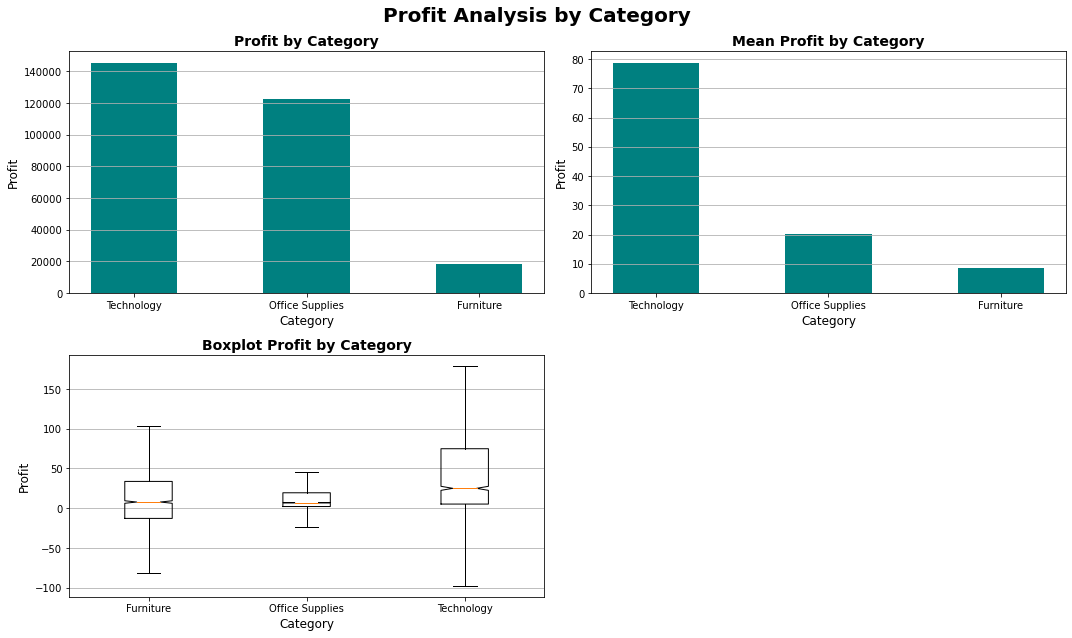

In [204]:
# Tính tổng giá trị Profit theo Category
# Gộp nhóm theo Category để tạo bảng tính tổng và lưu vào dataframe
profit_per_category = df[['Category', 'Profit']].groupby('Category').sum().reset_index()
profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Category và lưu vào dataframe
mean_profit_per_category = df[['Category', 'Profit']].groupby('Category').mean().reset_index()
mean_profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Profit Analysis by Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(profit_per_category['Category'], profit_per_category['Profit'], width=0.5, color='teal')
axs[0, 0].set_title('Profit by Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Category', fontsize=12)
axs[0, 0].set_ylabel('Profit', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_profit_per_category['Category'], mean_profit_per_category['Profit'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Profit by Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Category', fontsize=12)
axs[0, 1].set_ylabel('Profit', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Category'] == category]['Profit'] for category in df['Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Profit by Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Category', fontsize=12)
axs[1, 0].set_ylabel('Profit', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Category'].unique())
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

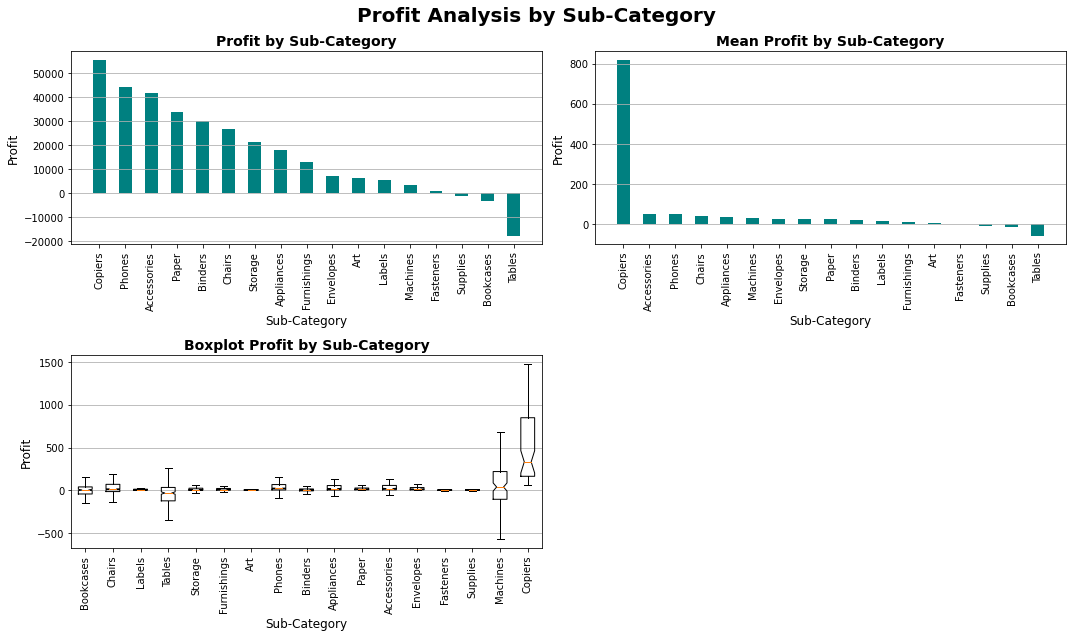

In [205]:
# Tính tổng giá trị Profit theo Sub-Category
# Gộp nhóm theo Sub-Category để tạo bảng tính tổng và lưu vào dataframe
profit_per_Sub_Category = df[['Sub-Category', 'Profit']].groupby('Sub-Category').sum().reset_index()
profit_per_Sub_Category.sort_values(by='Profit', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Sub-Category và lưu vào dataframe
mean_profit_per_Sub_Category = df[['Sub-Category', 'Profit']].groupby('Sub-Category').mean().reset_index()
mean_profit_per_Sub_Category.sort_values(by='Profit', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Profit Analysis by Sub-Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(profit_per_Sub_Category['Sub-Category'], profit_per_Sub_Category['Profit'], width=0.5, color='teal')
axs[0, 0].set_title('Profit by Sub-Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Sub-Category', fontsize=12)
axs[0, 0].set_ylabel('Profit', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10,rotation=90)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_profit_per_Sub_Category['Sub-Category'], mean_profit_per_Sub_Category['Profit'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Profit by Sub-Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Sub-Category', fontsize=12)
axs[0, 1].set_ylabel('Profit', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10,rotation=90)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Sub-Category'] == Sub_Category]['Profit'] for Sub_Category in df['Sub-Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Profit by Sub-Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Sub-Category', fontsize=12)
axs[1, 0].set_ylabel('Profit', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Sub-Category'].unique(),rotation=90)
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

#### 3. Quantity

Tính số lượng (Quantity) các sản phẩm đã bán dựa theo Category và Sub-category. Cách làm tương tự như trên.

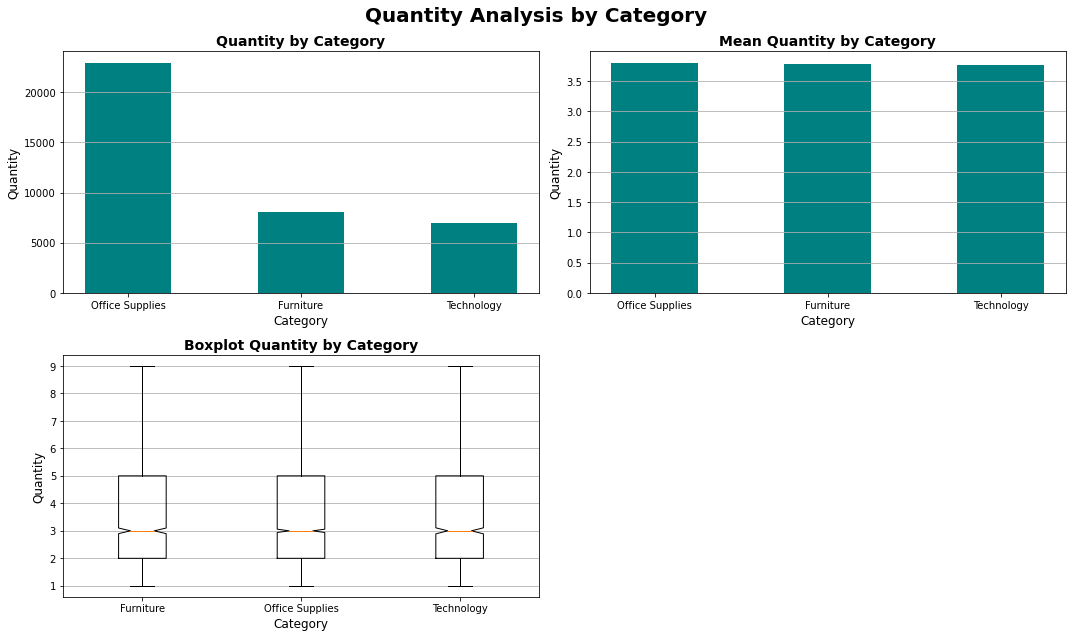

In [206]:
# Tính tổng giá trị Quantity theo Category
# Gộp nhóm theo Category để tạo bảng tính tổng và lưu vào dataframe
Quantity_per_category = df[['Category', 'Quantity']].groupby('Category').sum().reset_index()
Quantity_per_category.sort_values(by='Quantity', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Category và lưu vào dataframe
mean_Quantity_per_category = df[['Category', 'Quantity']].groupby('Category').mean().reset_index()
mean_Quantity_per_category.sort_values(by='Quantity', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Quantity Analysis by Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(Quantity_per_category['Category'], Quantity_per_category['Quantity'], width=0.5, color='teal')
axs[0, 0].set_title('Quantity by Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Category', fontsize=12)
axs[0, 0].set_ylabel('Quantity', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_Quantity_per_category['Category'], mean_Quantity_per_category['Quantity'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Quantity by Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Category', fontsize=12)
axs[0, 1].set_ylabel('Quantity', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Category'] == category]['Quantity'] for category in df['Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Quantity by Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Category', fontsize=12)
axs[1, 0].set_ylabel('Quantity', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Category'].unique())
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

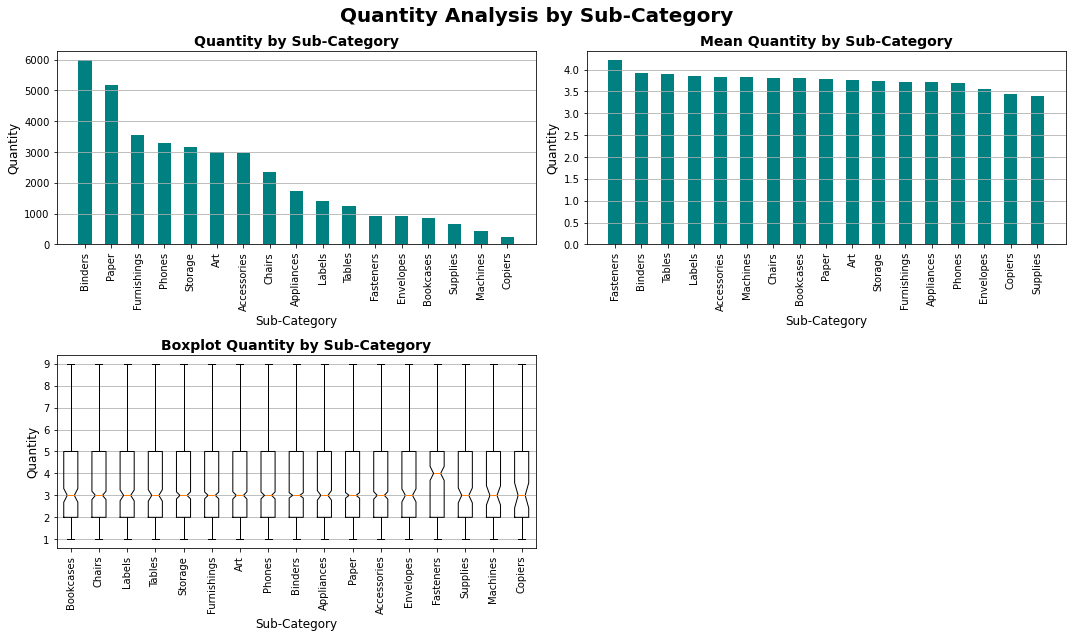

In [207]:
# Tính tổng giá trị Quantity theo Sub-Category
# Gộp nhóm theo Sub-Category để tạo bảng tính tổng và lưu vào dataframe
Quantity_per_Sub_Category = df[['Sub-Category', 'Quantity']].groupby('Sub-Category').sum().reset_index()
Quantity_per_Sub_Category.sort_values(by='Quantity', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Sub-Category và lưu vào dataframe
mean_Quantity_per_Sub_Category = df[['Sub-Category', 'Quantity']].groupby('Sub-Category').mean().reset_index()
mean_Quantity_per_Sub_Category.sort_values(by='Quantity', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Quantity Analysis by Sub-Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(Quantity_per_Sub_Category['Sub-Category'], Quantity_per_Sub_Category['Quantity'], width=0.5, color='teal')
axs[0, 0].set_title('Quantity by Sub-Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Sub-Category', fontsize=12)
axs[0, 0].set_ylabel('Quantity', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10,rotation=90)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_Quantity_per_Sub_Category['Sub-Category'], mean_Quantity_per_Sub_Category['Quantity'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Quantity by Sub-Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Sub-Category', fontsize=12)
axs[0, 1].set_ylabel('Quantity', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10,rotation=90)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Sub-Category'] == Sub_Category]['Quantity'] for Sub_Category in df['Sub-Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Quantity by Sub-Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Sub-Category', fontsize=12)
axs[1, 0].set_ylabel('Quantity', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Sub-Category'].unique(),rotation=90)
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

**Từ các biểu đồ về phân tích sản phẩm như trên, ta rút ra được các nhận xét như sau:**
1. Về doanh số bán hàng (Biểu đồ 1, 2):
- Xét theo Category: Nhóm Technology (Các hàng hoá liên quan đến công nghệ) luôn có tổng doanh số, trung bình doanh số cao nhất, tiếp đến là nhóm Funiture (nội thất) và thấp nhất là nhóm Office Supplies.
- Xét theo Sub-Category: xét về tổng doanh số (Sales) thì Phones and Chair là lớn nhất, còn xét về Sales trung bình thì Copies và Machines có Sales trung bình cao nhất, và cao hơn hẳn so với các sản phẩm còn lại.
- Về Boxplot, ta thấy hầu hết các loại hàng đều có Sales phân bố trong khoảng khá hẹp (Ngoại trừ Machines và Copies, biểu đồ 2).
2. Về lợi nhuận (Biểu đồ 3, 4):
- Xét theo Category: Nhóm Technology luôn có tổng lợi nhuận và trung bình lợi nhuận cao nhất (riêng trung bình lợi nhuận thì Technology chiếm ưu thế áp đảo so với 2 nhóm mặt hàng Funiture và Office Supplies).
- Xét theo Sub-Category: Copies, Phones, Accessories có tổng lợi nhuận cao nhất. Thế nhưng nếu xét về trung bình lợi nhuận thì Copies có lợi nhuận lớn nhất và áp đảo hoàn toàn so với toàn bộ những sản phẩm khác. Có một điểm đặt biệt là có những sản phẩm mang lại lợi nhuận âm (Bookcases, Supplies, Tables).
- Về Boxplot, ta thấy Machines và Copies là có khoảng phân bố rộng và cao hơn, còn tất cả những sản phẩm còn lại có khoảng phân bố khá hẹp và thấp hơn.
3. Về số lượng (Biểu đồ 5, 6):
- Xét theo Category: tổng số lượng đặt mua của Office Supplies là lớn nhất, nhưng về số lượng trung bình trên mỗi đơn đặt hàng thì cả 3 loại sản phẩm đều có số lượng đặt hàng gần như nhau (xấp xỉ 3,8 mặt hàng/1 đơn hàng).
- Xét theo Sub-Category: Binders, Papers có số lượng đặt hàng cao nhất. Thế nhưng, về trung bình số lượng hàng / 1 đơn đặt hàng thì hầu như tất cả các loại sản phẩm đều ngang nhau.
- Về Botplot: Tất cả các loại sản phẩm đều khá giống nhau về khoảng phân bố.

**Từ những đánh giá trên, ta có thể tổng hợp lại như sau**:
- Office Supplies luôn có số lượng bán ra nhiều nhất (ví dụ như Binders, Papers,...). Thế nhưng chúng lại có doanh số bán ra và lợi nhuận không phải là cao nhất.
- Trong khi đó, Technology dù số lượng không bán ra nhiều, nhưng chúng lại chiếm doanh số và lợi nhuận lớn nhất.
- Funiture thì số lượng bán ra cũng không nhiều, chúng cũng mang lại quá nhiều lợi nhuận, thậm chí có một số mặt hàng có lợi nhuận âm (Tables, Bookcases,...)

Từ đây, ta có thể gợi ý một vài chính sách để tăng cường lợi nhuận cho siêu thị như:
- Tăng số lượng hàng hoá nhập vào thuộc nhóm Technology để tăng lợi nhuận
- Giảm nhập vào một số hàng hoá thuộc nhóm Funiture vì chúng mang lại rất ít lợi nhuận
- Vẫn giữ số lượng hàng hoá nhập vào của Office Supplies, mặc dù chúng không mang lại quá nhiều lợi nhuận như Technology nhưng người dùng có nhu cầu rất lớn về những mặt hàng này (Có thể thấy qua Quantity thì Office Supplies chiếm số lượng lớn nhất).

### Câu 5: Hãy phân tích về các sự kiện discount của cửa hàng và mối liên hệ giữa Discount và các yếu tố khác.

Để trả lời câu hỏi này, ta sẽ phân tích các yếu tố khi có Discount và khi không có Discount có sự khác biệt với nhau như thế nào. Các yếu tố này có thể bao gồm: Total Sales, Mean Sales, Total Profits,...

#### 1. Discount và Sales

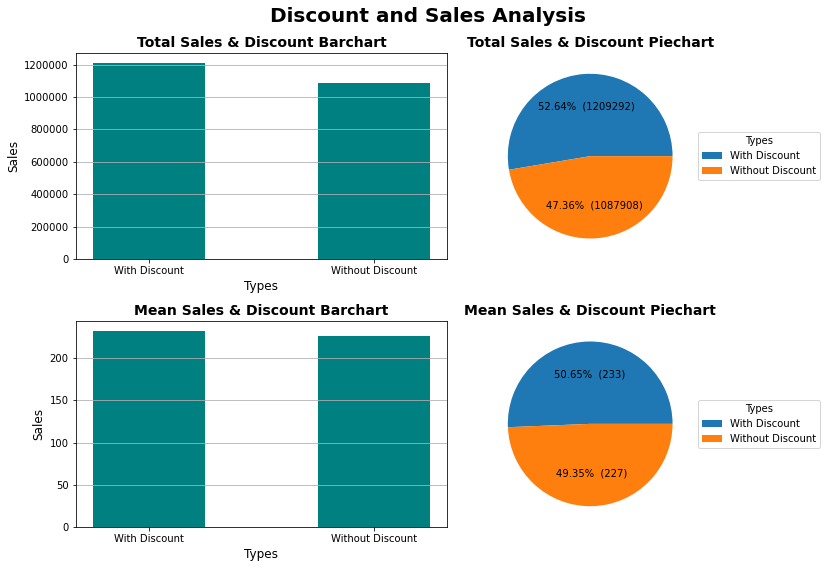

In [208]:
# Tổng hợp dữ liệu
orders_with_discount = df.copy()
orders_with_discount['With Discount'] = orders_with_discount['Discount'].apply(lambda x: x > 0)
orders_with_discount.replace({False: 'Without Discount', True: 'With Discount'}, inplace = True)

orders_with_discount_sales = orders_with_discount[['With Discount', 'Sales']].groupby('With Discount', as_index = False).sum()
orders_with_discount_meanSales = orders_with_discount[['With Discount', 'Sales']].groupby('With Discount', as_index = False).mean()

# Vẽ biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.suptitle('Discount and Sales Analysis',fontweight='bold',fontsize=20)

# Hàm để tính tỉ lệ %
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Vẽ biểu đồ con 1
axs[0, 0].bar(orders_with_discount_sales['With Discount'], orders_with_discount_sales['Sales'], width=0.5, color='teal')
axs[0, 0].set_title('Total Sales & Discount Barchart', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Types', fontsize=12)
axs[0, 0].set_ylabel('Sales', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].pie(orders_with_discount_sales['Sales'], autopct=make_autopct(orders_with_discount_sales['Sales']))
axs[0, 1].set_title('Total Sales & Discount Piechart',fontsize=14, fontweight='bold')
axs[0,1].legend(orders_with_discount_sales['With Discount'],
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Vẽ biểu đồ con 3
axs[1, 0].bar(orders_with_discount_meanSales['With Discount'], orders_with_discount_meanSales['Sales'], width=0.5, color='teal')
axs[1, 0].set_title('Mean Sales & Discount Barchart', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Types', fontsize=12)
axs[1, 0].set_ylabel('Sales', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].tick_params(axis='x', which='major', labelsize=10)
axs[1, 0].grid(axis='y')

# Vẽ biểu đồ con 4
axs[1, 1].pie(orders_with_discount_meanSales['Sales'], autopct=make_autopct(orders_with_discount_meanSales['Sales']))
axs[1, 1].set_title('Mean Sales & Discount Piechart',fontsize=14, fontweight='bold')
axs[1, 1].legend(orders_with_discount_sales['With Discount'],
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


**Nhận xét**: Có vẻ như doanh số bán hàng khi Discount và không có Discount gần như tương đương nhau. Điều này chứng tỏ những đơn hàng có Discount chiếm doanh số tương đối lớn.

#### 2. Discount và Profits

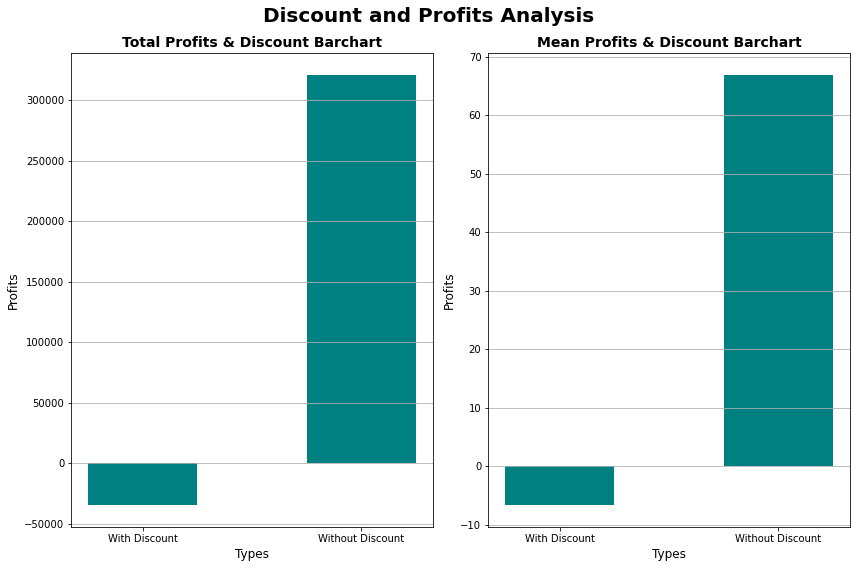

In [209]:
# Tổng hợp dữ liệu
orders_with_discount_profit = orders_with_discount[['With Discount', 'Profit']].groupby('With Discount', as_index = False).sum()
orders_with_discount_mean_profit = orders_with_discount[['With Discount', 'Profit']].groupby('With Discount', as_index = False).mean()

# Vẽ biểu đồ
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
fig.suptitle('Discount and Profits Analysis',fontweight='bold',fontsize=20)

# Hàm để tính tỉ lệ %
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Vẽ biểu đồ con 1
axs[0].bar(orders_with_discount_profit['With Discount'], orders_with_discount_profit['Profit'], width=0.5, color='teal')
axs[0].set_title('Total Profits & Discount Barchart', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Types', fontsize=12)
axs[0].set_ylabel('Profits', fontsize=12)
axs[0].ticklabel_format(style='plain', axis='y')
axs[0].tick_params(axis='x', which='major', labelsize=10)
axs[0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[1].bar(orders_with_discount_mean_profit['With Discount'], orders_with_discount_mean_profit['Profit'], width=0.5, color='teal')
axs[1].set_title('Mean Profits & Discount Barchart', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Types', fontsize=12)
axs[1].set_ylabel('Profits', fontsize=12)
axs[1].ticklabel_format(style='plain', axis='y')
axs[1].tick_params(axis='x', which='major', labelsize=10)
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

**Nhận xét:** Có vẻ như khi có Discount thì lợi nhuận tổng cộng và lợi nhuận trung bình thu được của sản phẩm giảm đi.


#### 3. Discount và Frequency

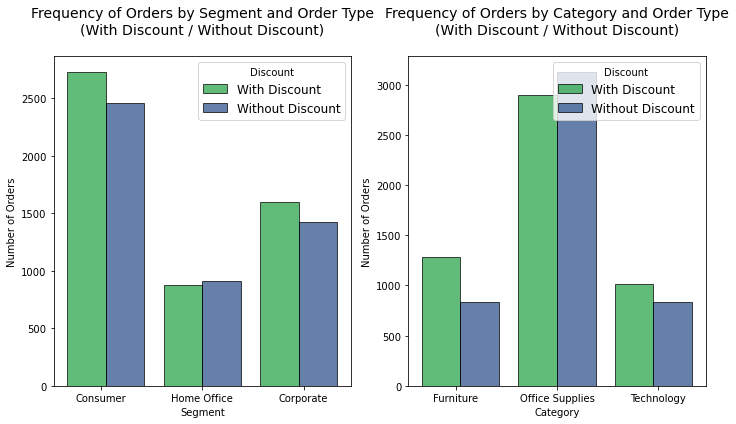

In [210]:
########## DISCOUNT AND SEGMENT FREQUENCY #############
# Prepare data
segment_data = orders_with_discount['Segment']
discount_data = orders_with_discount['With Discount']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

# Plot histogram
ax[0].hist([segment_data[discount_data == 'With Discount'], segment_data[discount_data == 'Without Discount']],
        bins = 3,
        color=['#1FA040','#254B87'],
        label=['With Discount', 'Without Discount'],
        alpha = 0.7,
        edgecolor = 'black')

# Set Title and x/y ax[0]is labels
ax[0].set_title("Frequency of Orders by Segment and Order Type\n(With Discount / Without Discount)", fontsize=14, y=1.05)
ax[0].set_xlabel("Segment")
ax[0].set_ylabel("Number of Orders")

# Set legend
ax[0].legend(title="Discount", fontsize=12)

ax[0].set_xticks([0.3,1, 1.7])

########## DISCOUNT AND CATEGORY FREQUENCY #############
# Plot histogram
category_data = orders_with_discount['Category']
discount_data = orders_with_discount['With Discount']
ax[1].hist([category_data[discount_data == 'With Discount'], category_data[discount_data == 'Without Discount']],
        bins = 3,
        color=['#1FA040','#254B87'],
        label=['With Discount', 'Without Discount'],
        alpha = 0.7,
        edgecolor = 'black')

# Set Title and x/y ax[1]is labels
ax[1].set_title("Frequency of Orders by Category and Order Type\n(With Discount / Without Discount)", fontsize=14, y=1.05)
ax[1].set_xlabel("Category")
ax[1].set_ylabel("Number of Orders")

# Set legend
ax[1].legend(title="Discount", fontsize=12)

ax[1].set_xticks([0.3,1, 1.7])


# Adjust layout
fig.tight_layout()

plt.show()

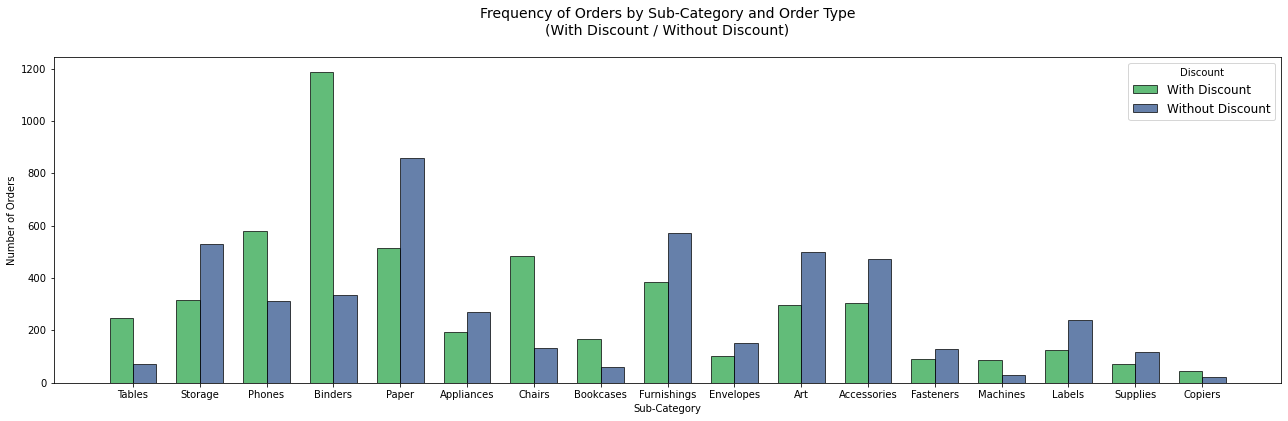

In [211]:

# Prepare data
SubCategory_data = orders_with_discount['Sub-Category']
discount_data = orders_with_discount['With Discount']
fig, ax = plt.subplots(figsize=(22,6))

# Plot histogram
hist = ax.hist([SubCategory_data[discount_data == 'With Discount'], SubCategory_data[discount_data == 'Without Discount']],
               bins = 17,
               color=['#1FA040','#254B87'],
               label=['With Discount', 'Without Discount'],
               alpha = 0.7,
               rwidth=0.7,
               edgecolor = 'black')

# Set Title and x/y axis labels
ax.set_title("Frequency of Orders by Sub-Category and Order Type\n(With Discount / Without Discount)", fontsize=14, y=1.05)
ax.set_xlabel("Sub-Category")
ax.set_ylabel("Number of Orders")

# Set legend
ax.legend(title="Discount", fontsize=12)

# Set x ticks and labels
midpoints = 0.5 * (hist[1][1:] + hist[1][:-1]) # Calculate the midpoints of each bin
ax.set_xticks(midpoints)

plt.show()

**Nhận xét:** 
- Về mối liên hệ giữa Discount và Segment: Ta thấy ở các phân khúc, khi có Discount thì số lượng đơn hàng của các Segment tăng lên (Ngoại trừ HomeOffice thì có hơi giảm một chút).
- Về mối liên hệ giữa Discount và Category: Số đơn hàng của Funiture và Technology khi có Discount tăng lên nhiều hơn.
- Về mối liên hệ giữa Discount và Sub-Category: Một số loại hàng khi có Discount tăng nhiều hơn khi không có Discount như: Binders, Phones, Chairs, Bookcases, Tables. Những loại hàng còn lại thì dù có Discount nhưng số đơn hàng vẫn ít hơn không có Discount. Có lẽ do sự cần thiết của những loại hàng này nên họ không đợi khi có Discount rồi mới mua hàng.

**Tóm lại**:
- Discount ảnh hưởng khá nhiều đến doanh số bán hàng, khi doanh số mua hàng có Discount xấp xỉ doanh số khi không có Discount.
- Thế nhưng, về tổng lợi nhuận và lợi nhuận trung bình thì khi có Discount, lợi nhuận là số âm (nghĩa là khi có Discount thì bán bị lỗ).
- Discount ảnh hưởng tương đối lớn đến tần suất mua hàng, khi số lượng các đơn hàng có Discount gần bằng số lượng đơn hàng không có Discount.
- Với mỗi loại mặt hàng khác nhau thì Discount sẽ có các mức độ ảnh hưởng khác nhau.
- Như vậy, ta có thể rút ra được rằng: Dù Discount làm giảm đi lợi nhuận, thế nhưng mức giảm này không quá lớn, vì thế siêu thị có thể khuyến mãi thêm nhiều Discount để tăng thêm doanh số bán hàng.

### Câu 6: Đánh giá và phân tích về khách hàng


**Top khách hàng theo Sales**


<Axes: title={'center': 'Tên khách hàng & Số lượng đơn hàng'}>

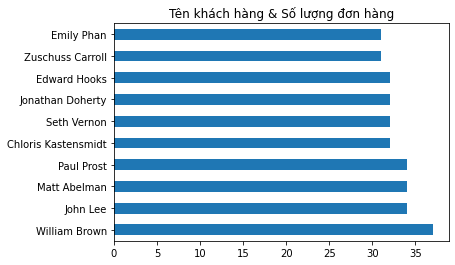

In [212]:
df['Customer Name'].value_counts()[:10].plot(kind='barh',title='Tên khách hàng & Số lượng đơn hàng')

**Phần trăm lợi nhuận của Top 9 khách hàng**

In [213]:
customers = list(df['Customer Name'].value_counts()[:10].index)
filters = df['Customer Name'].isin(customers)
A = df[filters]

In [214]:
#  Zuschuss Carroll is in the top 10 but her/his profit is negative
A = A[A['Customer Name'] != 'Zuschuss Carroll']
del customers[-2]

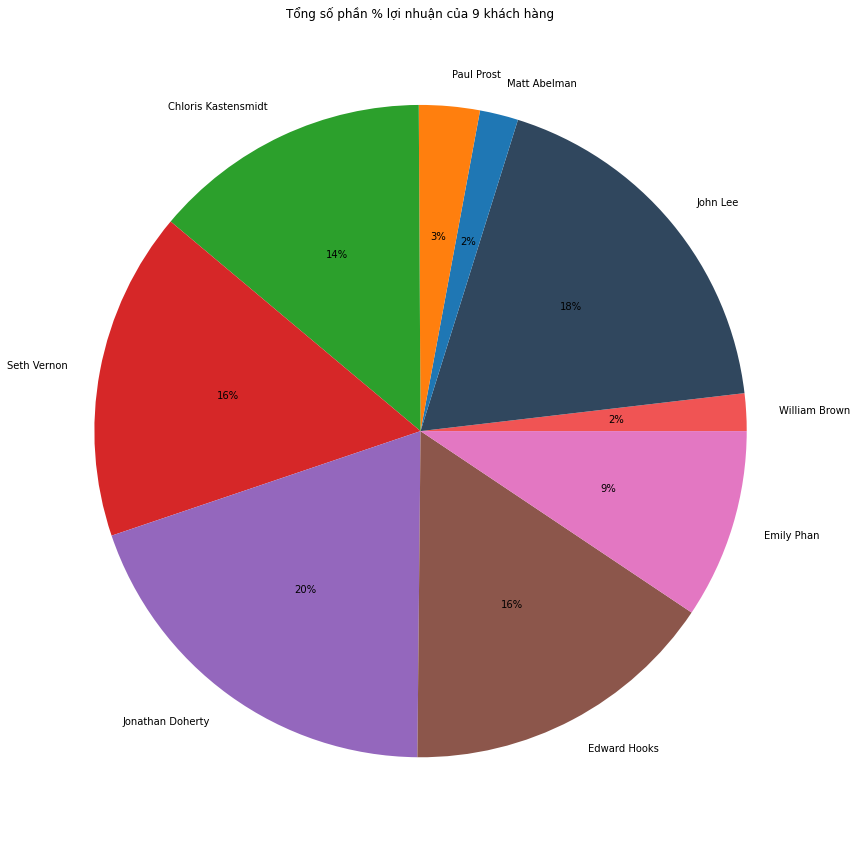

In [215]:
colors = color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
plt.figure(figsize=(15,15))
values = A.groupby('Customer Name')['Profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Tổng số phần % lợi nhuận của 9 khách hàng")
plt.show()

**Danh mục khách hàng mua nhiều nhất** 

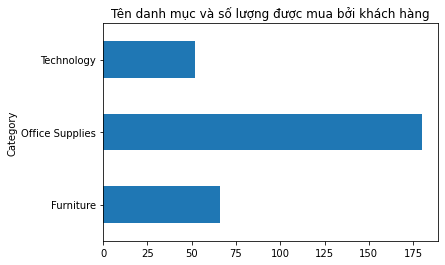

In [216]:
values = A.groupby('Category')['Customer Name'].count().plot(kind='barh',title='Tên danh mục và số lượng được mua bởi khách hàng')

**Phân khúc bán hàng**

In [217]:
segments_info = df.groupby("Segment").sum().reset_index()
segments_info

<ipython-input-217-4524f742e94b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Segment,Row ID,Sales,Quantity,Discount,Profit
0,Consumer,25581329,1.161401e+06,19521,820.91,134119.2092
1,Corporate,15504734,7.061464e+05,11608,477.85,91979.1340
2,Home Office,8858952,4.296531e+05,6744,262.33,60298.6785


In [218]:
segments_info[['Segment' , 'Sales']]

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


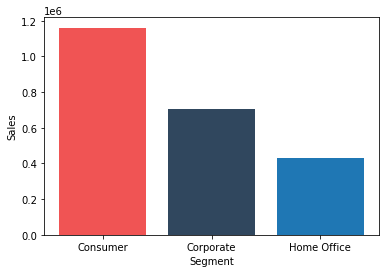

In [219]:
Viz_Bar(segments_info , 'Segment' ,'Sales')

**Lợi nhuận khách hàng**

In [220]:
segments_info[['Segment' , 'Profit']]

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


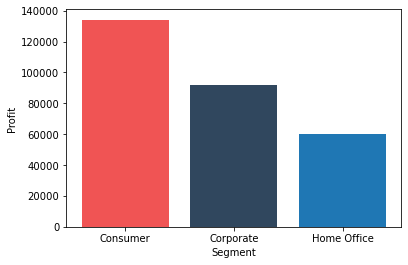

In [221]:
Viz_Bar(segments_info , 'Segment' ,'Profit')

### Câu 7: Phân tích mối quan hệ giữa khách hàng và khu vực sinh sống.

**Số lượng khách hàng và trung bình Sales và Profit theo khu vực sinh sống**

In [222]:
data_3= df.groupby(['Region','State'], as_index=False).agg(
                                number_order= ('Row ID','count'),
                                Số_lượng_khách_hàng= ('Customer ID','count'),
                                total_sale= ('Sales','sum'), 
                                total_profit= ('Profit','sum'))
data_3['Trung bình Sale']= data_3['total_sale']/data_3['Số_lượng_khách_hàng']
data_3['Trung bình Profit']= data_3['total_profit']/data_3['Số_lượng_khách_hàng']
data_3.head(2)

,Region,State,number_order,Số_lượng_khách_hàng,total_sale,total_profit,Trung bình Sale,Trung bình Profit
0,Central,Illinois,492,492,80166.101,-12607.8870,162.939230,-25.625787
1,Central,Indiana,149,149,53555.360,18382.9363,359.431946,123.375411


In [223]:
col_list= ['Trung bình Sale','Trung bình Profit']
def customer_1(data_3,col):
    fig= px.scatter(data_3, x="Số_lượng_khách_hàng", y=col, 
                   size='number_order',color="Region",
                 hover_name="State", log_x=True, size_max=80, 
                   title= f'Số lượng khách hàng và {col} theo bang')
    return fig

In [224]:
customer_fig_1=[]
for col in col_list:
    customer_fig_1.append(customer_1(data_3,col))

In [225]:
customer_fig_1[0]

In [226]:
customer_fig_1[1]

## Câu hỏi 8: 

**Nội dung câu hỏi:** Phân tích mối quan hệ lợi nhuận và doanh thu.


**Loại biểu đồ sử dụng:** Bar Chart

**Tính phù hợp của biểu đồ với dữ liệu:** Bar chart là một loại biểu đồ được sử dụng để hiển thị một loạt các giá trị dưới dạng các thanh hình chữ nhật. Biểu đồ này thường được sử dụng để thể hiện các loại dữ liệu phân loại hoặc dữ liệu định lượng. Vì thế, Bar chart là một công cụ hữu ích để so sánh các giá trị khác nhau theo các nhóm khác nhau, qua đó thấy được mối quan hệ giữa lợi nhuận và doanh thu.




**Tỉ lệ Profit và Sales của mỗi mặt hàng**

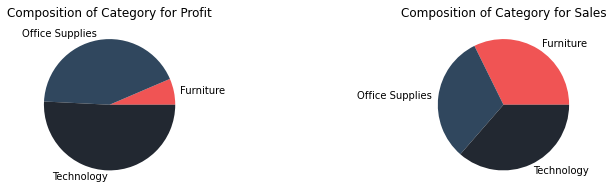

In [227]:
df_pie = df[['Category','Sales','Profit']]
df_pie = df_pie.groupby(['Category']).sum().reset_index()

plt.figure(figsize=(10,15))

# Vẽ biểu đồ Pie Chart (Profit)
plt.subplot(1,3,1)
plt.pie(df_pie['Profit'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Profit")

# Vẽ biểu đồ Pie Chart (Sales)
plt.subplot(1,3,3)
plt.pie(df_pie['Sales'], labels=df_pie['Category'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Composition of Category for Sales")


plt.show()

**Mối quan hệ giữa Sales và Profit**

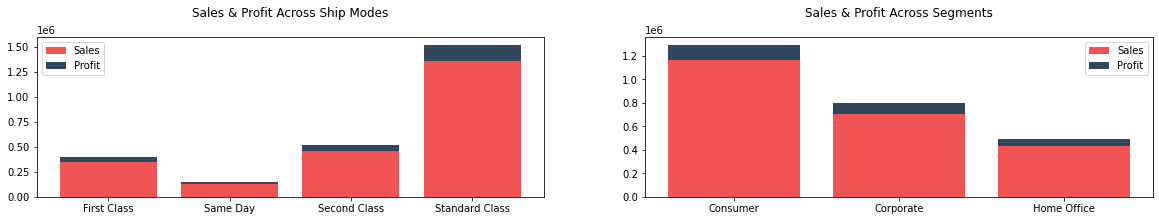

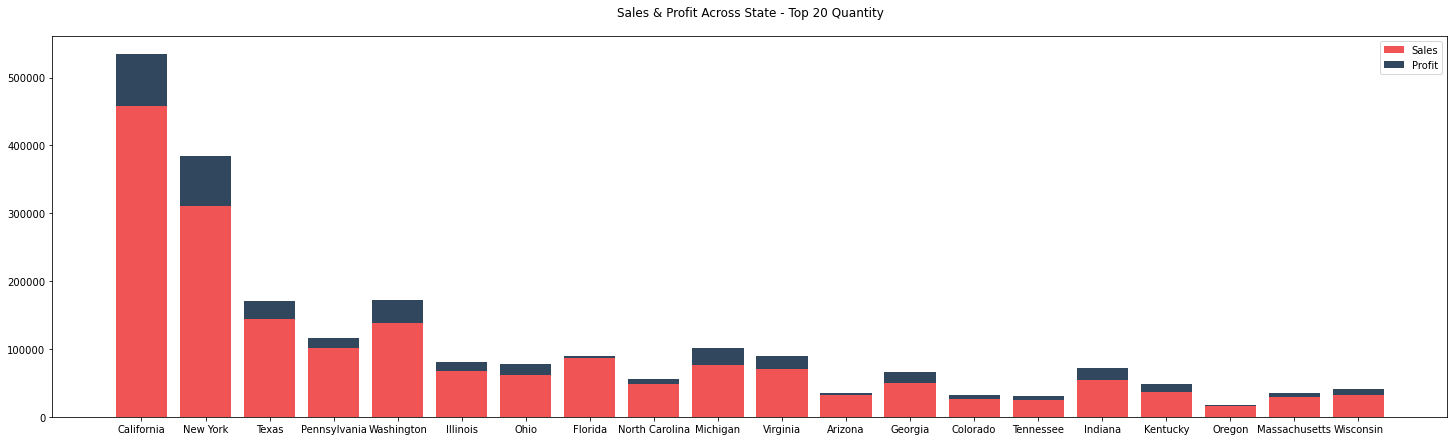

In [228]:
# Ship Modes
df_shipmode = df[['Ship Mode','Sales','Profit']]
df_shipmode = df_shipmode.groupby(['Ship Mode']).sum().reset_index()
plt.figure(figsize=[20,10])
plt.subplot(3,2,1)
plt.bar(x=df_shipmode['Ship Mode'], height=df_shipmode['Sales'], color='#F05454')
plt.bar(x=df_shipmode['Ship Mode'], height=df_shipmode['Profit'], bottom=df_shipmode['Sales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=12, pad=20)
plt.legend(['Sales','Profit'])


#Segment
df_segment = df[['Segment','Sales','Profit']]
df_segment = df_segment.groupby(['Segment']).sum().reset_index()
plt.subplot(3,2,2)
plt.bar(x=df_segment['Segment'], height=df_segment['Sales'], color='#F05454')
plt.bar(x=df_segment['Segment'], height=df_segment['Profit'], bottom=df_segment['Sales'], color='#30475E')
plt.title("Sales & Profit Across Segments", size=12, pad=20)
plt.legend(['Sales','Profit'])

#State(top20-quantity)
df_state = df[['State','Sales','Profit','Quantity']]
df_state = df_state.groupby(['State']).sum().reset_index()
df_state = df_state.sort_values("Quantity",ascending=False)
df_state = df_state.head(20)
plt.figure(figsize=[25,7])
plt.subplot(1,1,1)
plt.bar(x=df_state['State'], height=df_state['Sales'], color='#F05454')
plt.bar(x=df_state['State'], height=df_state['Profit'], bottom=df_state['Sales'], color='#30475E')
plt.title("Sales & Profit Across State - Top 20 Quantity", size=12, pad=20)
plt.legend(['Sales','Profit'])


**Nhận xét**

Mối quan hệ giữa Sales và Profit được thể hiện rõ ràng và khá giống nhau qua ba biểu đồ.

Với Ship Modes và Segments, ta thấy Sales tỷ lệ thuận với Profit và không có ngoại lệ nào.

Với State, nhìn chung Sales càng lớn thì tỉ lệ Profit lớn càng cao, tuy nhiên không đồng nhất và có vài ngoại lệ có thể kể đến như:

+ Florida và Ohio: Florida có lượng doanh thu lớn hơn Ohio nhưng lợi nhuận của Ohio lại cao hơn Florida

+ Pennsylvania và Michigan: Pennsylvania có lượng doanh thu lớn hơn Michigan nhưng lợi nhuận của Michigan lại cao hơn Pennsylvania

+ ...

**Kết luận**

Doanh thu bán hàng càng lớn thì lợi nhuận càng lớn và ngược lại, tuy có vài ngoại lệ nhưng không đáng kể.